In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from scipy import signal

%matplotlib inline

font = {'family' : 'sans-serif', 'weight' : 'normal', 'size'   : 16}
matplotlib.rc('font', **font)

In [2]:
loc = 'C:/Users/MichaelDelph/Dropbox (Myomo Inc)/!Engineering/Project Files/Saturn/Designs/Behaviors/Position control/'
loc = 'C:/Users/MichaelDelph/Dropbox (Myomo Inc)/!Engineering/Project Files/Saturn/Designs/Behaviors/Position control/Thermal Spin Down/With PID Spin Down/'
loc = 'C:/Users/MichaelDelph/Dropbox (Myomo Inc)/!Engineering/Project Files/Saturn/Designs/Behaviors/Position control/Bridge Eval/'
file_name = 'Thermal Adjust 80 Test 1'
# file_name = 'Thermal Adjust 60 Test 1'
# file_name = 'Thermal Adjust 40 Test 1'
# file_name = 'PID Limit 90 Thermal Factor 60_40 Test 1'
# file_name = 'PID Limit 90 Thermal Factor 60_40 Test 2 - Hold Pos'
# file_name = 'PID Limit 90 thermal Factor 60_40 Test 3'
# file_name = 'PID Limit 90 thermal Factor 60_40 Test 4'
# file_name = 'PID Limit 95 thermal Factor 60_40 Test 1'
# file_name = 'PID Limit 92 thermal Factor 60_40 Test 1'
# file_name = 'PID Limit 85 thermal Factor 60_40 Test 1'
# file_name = 'PID Limit 85 thermal Factor 60_40 Test 2'
# file_name = 'PID Limit 85 thermal Factor 60_40 Test 3'

# Scale_Factor = 60



extnd = '.csv'
input_file = loc + file_name + extnd


df_raw = pd.read_csv(input_file, header=0, dtype=np.float64)
print (df_raw.columns)

t = df_raw['time'].values
t = t - t[0]
t = t/60
# Mot_deg = df_raw['mot_deg'].values

PID_SP = df_raw['SP'].values
PID_Input = df_raw['Input'].values

mot_input = df_raw['motor_input'].values
PWM = df_raw['PWM'].values


mot_Temp = df_raw['mot_temp'].values

Amps = df_raw['bat_current'].values

temp_state = df_raw['therm_state'].values

# ext_temp = df_raw['external_temp'].values
# ext_temp = (ext_temp * 9/5)+32
# t_ext = df_raw['extern_time'].values
# print(t)

temp_delta = mot_Temp - mot_Temp[0]


# Scale_Factor = str(Scale_Factor)

lowLim_bar = [100] * len(t)
highLim_bar = [120] * len(t)
# trim_current = [1.3] * len(t)



Index(['time', 'SP', 'Input', 'PWM', 'mot_temp', 'therm_state', 'bat_current',
       'motor_input'],
      dtype='object')


(0, 3)

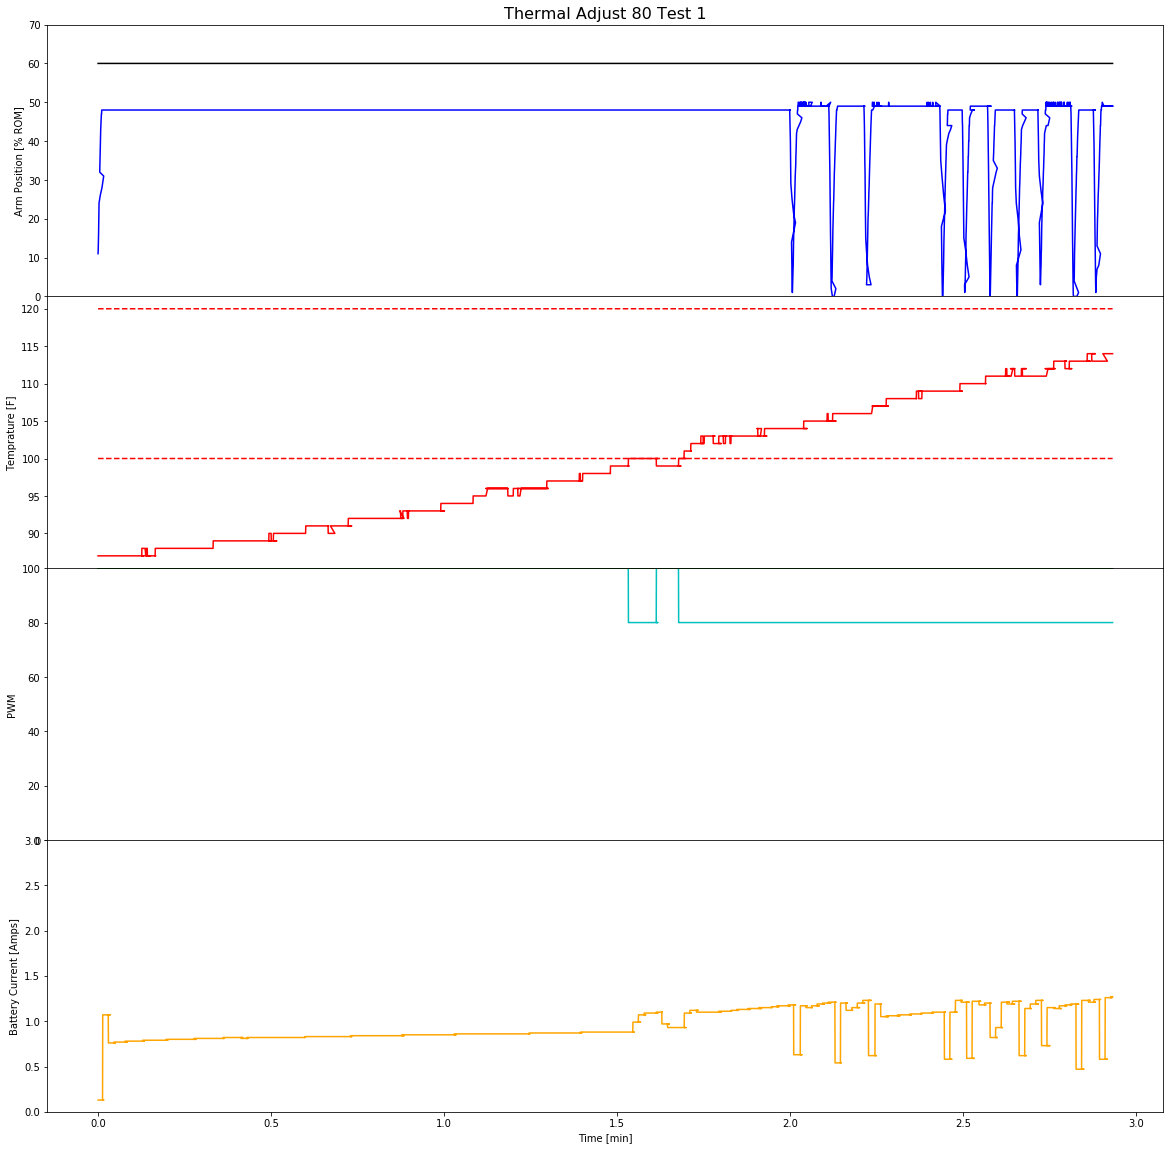

In [3]:
fig, axs = plt.subplots(4, 1, sharex=True)
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)
fig.set_figheight(20)
fig.set_figwidth(20)
# fig.suptitle('PID Limit 90 Thermal Sclae Down Factor- Hold Position: '+Scale_Factor, fontsize=16)

# Plot each graph, and manually set the y tick values
axs[0].plot(t, PID_SP , color = 'k')
axs[0].plot(t, PID_Input, color = 'b')
# axs[0].set_xlabel('distance (m)')
axs[0].set_ylabel('Arm Position [% ROM]')
axs[0].set_title(file_name, fontsize=16)
# axs[0].set_yticks(np.arange(-0.9, 1.0, 0.4))
axs[0].set_ylim(0, 70)
# axs[0].set_xlim(2.1,2.15)

axs[1].plot(t, mot_Temp, color = 'r')
axs[1].plot(t,lowLim_bar, '--r')
axs[1].plot(t,highLim_bar, '--r')
axs[1].set_ylabel('Temprature [F]')
# axs[1].set_yticks(np.arange(0.1, 1.0, 0.2))
# axs[1].set_ylim(0, 1)

axs[2].plot(t, mot_input, color = 'c')
axs[2].plot(t, PWM, color = 'g')
axs[2].set_ylabel('PWM')
# axs[2].set_yticks(np.arange(-0.9, 1.0, 0.4))
axs[2].set_ylim(0, 100)

axs[3].plot(t, Amps, color = 'orange')
# axs[3].plot(t,trim_current, '--', color =  'orange')
axs[3].set_xlabel('Time [min]')
axs[3].set_ylabel('Battery Current [Amps]')
# axs[2].set_yticks(np.arange(-0.9, 1.0, 0.4))
axs[3].set_ylim(0, 3)
